In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Mixed Variables data.csv")
df.sample(7)

,Cabin,Ticket,number,Survived
142,NaN,STON/O2. 3101279,5,1
701,E24,PC 17475,5,1
488,NaN,A.5. 18509,2,0
629,NaN,334912,5,0
861,NaN,28134,2,0
41,NaN,11668,3,0
179,NaN,LINE,1,0


In [3]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'passengers travelling with')

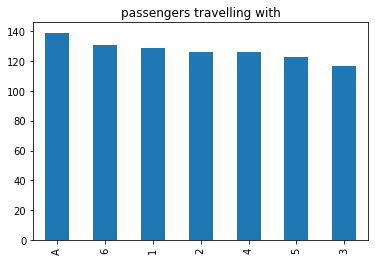

In [4]:
fig= df['number'].value_counts().plot.bar()
fig.set_title('passengers travelling with')

In [5]:
# extract numerical part
df['number_numberical'] =pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [6]:
# extract categorical part
df['number_categorical'] =np.where(df['number_numberical'].isnull(),df['number'],np.nan)
df.head()

,Cabin,Ticket,number,Survived,number_numberical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [7]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter
df.sample(8)

,Cabin,Ticket,number,Survived,number_numberical,number_categorical,cabin_num,cabin_cat
628,NaN,349224,2,0,2.0,NaN,NaN,NaN
480,NaN,CA 2144,5,0,5.0,NaN,NaN,NaN
885,NaN,382652,5,0,5.0,NaN,NaN,NaN
72,NaN,S.O.C. 14879,3,0,3.0,NaN,NaN,NaN
626,NaN,219533,1,0,1.0,NaN,NaN,NaN
834,NaN,2223,6,0,6.0,NaN,NaN,NaN
740,D45,16988,5,1,5.0,NaN,45,D
329,B18,111361,5,1,5.0,NaN,18,B


<AxesSubplot:ylabel='cabin_cat'>

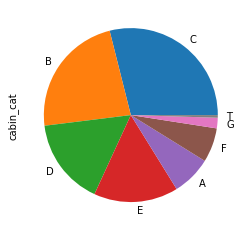

In [10]:
df['cabin_cat'].value_counts().plot(kind='pie')

In [11]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])
df.sample(7)

,Cabin,Ticket,number,Survived,number_numberical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
265,NaN,C.A. 17248,3,0,3.0,NaN,NaN,NaN,17248.0,C.A.
802,B96 B98,113760,6,1,6.0,NaN,96,B,113760.0,NaN
177,C49,PC 17595,6,0,6.0,NaN,49,C,17595.0,PC
327,D,28551,5,1,5.0,NaN,NaN,D,28551.0,NaN
164,NaN,3101295,4,0,4.0,NaN,NaN,NaN,3101295.0,NaN
889,C148,111369,2,1,2.0,NaN,148,C,111369.0,NaN
154,NaN,Fa 265302,A,0,NaN,A,NaN,NaN,265302.0,Fa


In [12]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

<AxesSubplot:ylabel='ticket_cat'>

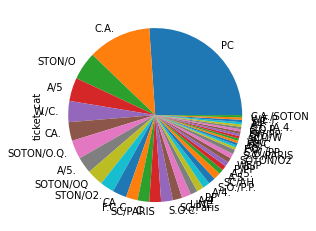

In [13]:
df['ticket_cat'].value_counts().plot(kind='pie')